**Lab2-DL: A1-CNN-intro.ipynb** (ELMED219) | Prioritet: 1 (kjerne)

_En kort introduksjon til CNN for medisinstudenter – AI-assistert notebook_

[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arvidl/ELMED219-2026/blob/main/Lab2-DL/notebooks/A1-CNN-intro.ipynb)

Sist oppdatert: 2025-12-04, A. Lundervold

Bruk `elmed219-2026` conda-miljøet eller Google Colab




## MNIST: Dyplæringens "Hello World"

### Hva er MNIST-problemet?

**MNIST** (Modified National Institute of Standards and Technology) er et datasett med **70 000 håndskrevne siffer** (0-9), der hver siffer er et 28×28 pikslers gråtonebilde. Oppgaven er enkel: gitt et bilde, klassifiser hvilket siffer det viser.

<div style="text-align: center; margin: 20px 0;">

| Eksempel | Oppgave |
|:--------:|:--------|
| ![0](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png) | Klassifiser hvert 28×28 bilde til én av 10 klasser (siffer 0-9) |

*Eksempler fra MNIST-datasettet. Kilde: Wikipedia*
</div>

### Historisk betydning

MNIST har spilt en avgjørende rolle i utviklingen av dyp læring:

| År | Milepæl | Betydning |
|----|---------|-----------|
| **1998** | Yann LeCun introduserer LeNet-5 | Første vellykkede CNN på MNIST (~99% nøyaktighet) |
| **2006** | Geoffrey Hinton relanserer dyp læring | MNIST blir standard benchmark |
| **2012** | AlexNet vinner ImageNet | CNN-arkitekturer fra MNIST skaleres opp |
| **I dag** | State-of-the-art: 99.8%+ | MNIST anses nå som "løst", men forblir pedagogisk verdifull |

> **"MNIST er for maskinlæring det 'Hello World' er for programmering"**  
> – Francois Chollet, skaperen av Keras

### Hvorfor MNIST for medisinstudenter?

MNIST illustrerer **kjerneprinsippene** som brukes i medisinsk bildeanalyse:

| MNIST-konsept | Medisinsk anvendelse |
|---------------|---------------------|
| Bildeklassifikasjon | Røntgen: normal vs. patologisk |
| Feature-ekstraksjon | Detektere lesjoner, tumorer, frakturer |
| Konvolusjonelle filtre | Kantdeteksjon i histopatologi |
| Sannsynlighetsoutput | Differensialdiagnose med konfidensgrad |

### PyTorch: Verktøyet vårt

**PyTorch** er et open-source rammeverk for dyp læring, utviklet av Meta AI. Vi bruker det fordi:

- 🔬 **Forskningsvennlig**: Brukes ved de fleste AI-laboratorier
- 🏥 **Medisinsk AI**: Standard i MONAI, fastMONAI, og andre medisinske AI-biblioteker  
- 📚 **Pedagogisk**: Klar og lesbar kode som viser hva som skjer "under panseret"
- ⚡ **GPU-akselerasjon**: Trener modeller raskt (fungerer også uten GPU)

```
Dataflyten i denne notebooken:

    MNIST-bilder (28×28)
           │
           ▼
    ┌─────────────┐
    │   PyTorch   │  ← Datalasting, tensorer, trening
    │   + CNN     │  ← Konvolusjon, pooling, klassifikasjon
    └─────────────┘
           │
           ▼
    Predikert siffer (0-9)
```

---

*La oss nå sette opp miljøet og utforske dataene!*


## Forstå CNN: Et medisinsk perspektiv

![Deep Learning hierarkisk feature-ekstraksjon](../assets/Waldrop-multiple-hidden-layers.png)

*__Figur:__ Dyp læring bygger på hierarkisk feature-ekstraksjon. Fra venstre: input-bilde → tidlige lag detekterer enkle mønstre (kanter, lys/mørke) → mellomliggende lag kombinerer disse til komplekse strukturer → output gir klassifikasjon. (Kilde: M. Waldrop, PNAS 2019)*

**Nøkkelkonsept:** Akkurat som hjernen din prosesserer visuell informasjon gjennom hierarkiske lag (fra retina til visuell korteks), lærer et CNN å gjenkjenne mønstre fra enkle til komplekse - fra piksler til diagnoser.

La oss forklare denne nevrale nettverksarkitekturen ved hjelp av analogier fra medisinsk bildebehandling og diagnostikk:

### Oversikt
Tenk på dette CNN som en medisinsk spesialist som undersøker et røntgenbilde eller et histologisnitt, og progressivt identifiserer mer komplekse mønstre før en diagnose stilles.

### Lag-for-lag forklaring (medisinsk kontekst):

1. **Input-lag (28x28 bilde)**
   - Som å motta et gråtone mikroskopbilde eller et lite røntgenutsnitt
   - Tilsvarer det du ser under lav forstørrelse
   - Størrelse: 28x28 piksler, én kanal (som et gråtone histologibilde)

2. **Første konvolusjonslag (Conv1)**
   - Som ditt første blikk gjennom mikroskopet
   - Detekterer 32 ulike grunnleggende mønstre (som cellekanter, enkle former)
   - Som å ha 32 ulike farginger som hver fremhever ulike grunnleggende egenskaper
   - Output: 26x26x32 (32 ulike "visninger" av bildet)

3. **Første pooling-lag (Pool1)**
   - Som å ta et steg tilbake for å få et bredere overblikk
   - Beholder de viktigste egenskapene mens detaljer reduseres
   - Tilsvarer når du zoomer ut på mikroskopet for å se mønstre
   - Reduserer størrelse til 13x13, men beholder alle 32 egenskapstyper

4. **Andre konvolusjonslag (Conv2)**
   - Som å lete etter mer komplekse mønstre
   - Ser nå etter 64 ulike kombinasjoner av de grunnleggende egenskapene
   - Tilsvarer hvordan du kombinerer grunnleggende funn til mer komplekse diagnoser
   - Eksempel: kombinerer celleform OG arrangement-mønstre

5. **Andre pooling-lag (Pool2)**
   - Ytterligere konsolidering av funn
   - Som å ta enda et steg tilbake for å se bredere mønstre
   - Reduserer til 5x5 størrelse, men beholder 64 egenskapstyper

6. **Første fullt tilkoblede lag (FC1)**
   - Som den innledende diagnostiske resonnering
   - Kombinerer alle observerte egenskaper (1600 inputs → 128 nevroner)
   - Tilsvarer hvordan du integrerer flere funn til differensialdiagnoser

7. **Siste lag (FC2)**
   - Den endelige diagnosen
   - 10 mulige utfall (som 10 mulige diagnoser)
   - Hver output representerer sannsynligheten for hver diagnose

### Medisinsk analogi for prosessen:
1. **Innledende undersøkelse** (Input → Conv1)
   - Som ditt første blikk på en pasient eller prøve
   - Identifiserer grunnleggende egenskaper (kanter, former, teksturer)

2. **Mønstergjenkjenning** (Pool1 → Conv2)
   - Tilsvarer å gjenkjenne mønstre i patologi
   - Kombinerer grunnleggende egenskaper til meningsfulle mønstre

3. **Integrasjon** (Pool2 → FC1)
   - Som å kombinere flere kliniske funn
   - Bygger et komplett klinisk bilde

4. **Diagnose** (FC2)
   - Endelig diagnostisk beslutning
   - Sannsynlighet for hver mulig diagnose

### Klinisk relevans:
- Tilsvarer hvordan du går fra grunnleggende observasjoner til endelig diagnose
- Speiler den medisinske beslutningsprosessen:
  1. Observer grunnleggende egenskaper
  2. Gjenkjenn mønstre
  3. Kombiner funn
  4. Still en diagnose

Dette er analogt med hvordan du kan undersøke et histologisnitt, der du starter med grunnleggende cellulære egenskaper og progressivt integrerer informasjon for å nå en diagnose.


## Forstå CNN-arkitekturvisualiseringen: Et medisinsk perspektiv

Denne koden lager en visuell representasjon av vårt nevrale nettverk, tilsvarende hvordan vi kan tegne et anatomisk diagram eller en klinisk arbeidsflyt. La oss forklare det i medisinske termer:

### Overordnet struktur
Tenk på dette som å lage et anatomisk atlas eller et klinisk forløpsdiagram:

```python
class CNNVisualizer:
    def __init__(self):
        # Fargeskjema som ulike vevsfarginger eller medisinske diagrammer
        self.colors = {
            'input': '#e2e8f0',    # Lysegrå for råbilde (som ufarget vev)
            'conv': '#93c5fd',     # Blå for egenskapsdeteksjon (som H&E-farging)
            'pool': '#bfdbfe',     # Lyseblå for sammendrag (som lav forstørrelse)
            'fc': '#fca5a5',       # Rød for beslutningstaking (som diagnostiske områder)
            'text': '#1e293b'      # Mørkegrå for etiketter (labels)
        }
```

### Lag-representasjon
Tilsvarende hvordan vi representerer ulike anatomiske strukturer eller diagnostiske trinn:

```python
layers = [
    # Som progresjon gjennom mikroskopforstørrelser
    {'name': 'Input\n28x28x1', 'type': 'input'},      # Rå prøve
    {'name': 'Conv1\n26x26x32', 'type': 'conv'},      # Innledende egenskaper (som cellegrenser)
    {'name': 'Pool1\n13x13x32', 'type': 'pool'},      # Bredere mønstre (som vevsarkitektur)
    {'name': 'Conv2\n11x11x64', 'type': 'conv'},      # Komplekse egenskaper (som cellearrangementer)
    {'name': 'Pool2\n5x5x64', 'type': 'pool'},        # Overordnede mønstre
    {'name': 'FC\n128->10', 'type': 'fc'}             # Endelig diagnose
]
```

### Visuelle elementer

1. **Blokker (rektangulære flater)**
   - Som ulike stadier i en klinisk arbeidsflyt
   - Størrelse indikerer kompleksitet (bredere blokker = mer kompleks prosessering)
   - Farger skiller mellom ulike typer analyse (som ulike fargingsteknikker)

2. **Piler**
   - Som kliniske forløp som viser progresjon
   - Tilsvarende hvordan vi tegner trinnvise diagnostiske prosesser
   - Viser informasjonsflyt fra observasjon til diagnose

3. **Tekstetiketter**
   - Som anatomiske etiketter eller diagnostiske kriterier
   - Viser dimensjoner og transformasjoner ved hvert trinn
   - Hjelper med å spore progresjonen i analysen

4. **Forklaring (legend)**
   - Tilsvarende hvordan vi merker ulike vevstyper i histologi
   - Forklarer betydningen av ulike farger
   - Hjelper med å tolke diagrammet

### Medisinsk analogi
Denne visualiseringen representerer en prosess som ligner på:
1. **Input-lag**: Innledende pasientpresentasjon/prøve
2. **Konvolusjonslag**: Detaljert undersøkelse (som bruk av ulike mikroskopobjektiver)
3. **Pooling-lag**: Ta et steg tilbake for å se bredere mønstre (som å bytte til lavere forstørrelse)
4. **Fullt tilkoblede lag**: Integrasjon av funn og diagnostisk beslutningstaking

### Klinisk relevans
- Diagrammet flyter fra venstre til høyre som et klinisk forløp
- Ulike farger representerer ulike typer analyse (som ulike diagnostiske verktøy)
- Progresjonen speiler medisinsk beslutningstaking:
  1. Innledende observasjon
  2. Detaljert undersøkelse
  3. Mønstergjenkjenning
  4. Diagnostisk konklusjon

Denne visualiseringen hjelper med å forstå hvordan CNN prosesserer informasjon, på samme måte som vi visualiserer kliniske arbeidsflyter eller anatomiske strukturer i medisinsk utdanning.


## Forstå konvolusjon: En medisinsk analogi

### Oversikt
Tenk på konvolusjon som å bruke et spesialisert filter eller farging for å fremheve spesifikke trekk i et medisinsk bilde – akkurat som ulike fargingsteknikker avslører ulike vevsegenskaper.

### De tre hovedkomponentene (som en fargingsprosess):

| Komponent | Beskrivelse | Medisinsk analogi |
|-----------|-------------|-------------------|
| **Input (originalbilde)** | 5×5 rutenett med pikselverdier | Som din opprinnelige vevsprøve eller røntgen |
| **Konvolusjonskjerne (filter)** | 3×3 mønster som fungerer som et "fargestoff" | Som å velge riktig farging for ønsket struktur |
| **Output (resultat)** | Viser hvor mønsteret ble detektert | Som det ferdige fargede bildet |

### Prosessen (som en fargingsprotokoll):

1. **Velg vindu** – Ta en 3×3-seksjon (som å fokusere mikroskopet på et område)
2. **Mønstermatching** – Multipliser pikselverdier med kjerneverdier (som fargeopptak i vev)
3. **Oppsummering** – Summer alle produkter til én verdi (som å måle fargeintensitet)
4. **Flytt vindu** – Gjenta for hele bildet

### Klinisk relevans
Konvolusjonskjernen er som å velge riktig farging:
- **H&E** for generell struktur
- **Spesialfarger** for spesifikke komponenter  
- **Immunfarging** for spesifikke proteiner

Denne visualiseringen viser hvordan CNN automatisk kan detektere mønstre i medisinske bilder.


## Forstå feature maps: En medisinsk analogi

### Oversikt
Tenk på dette som å se et medisinsk bilde gjennom ulike diagnostiske filtre:
- Ulike MR-sekvenser (T1, T2, FLAIR)
- Forskjellige fargingsteknikker i patologi
- Ulike vindusinnstillinger på CT

### Lag-for-lag visualisering:

| Lag | Visualisering | Medisinsk analogi |
|-----|---------------|-------------------|
| **Conv/Pool** | Feature maps (opptil 8 stk) | Som ulike farginger som fremhever ulike strukturer |
| **FC1** | Histogram over aktiveringer | Som distribusjon av laboratorieverdier |
| **FC2** | Stolpediagram per klasse | Som differensialdiagnose med konfidensgrad |

### Klinisk tolkning:

1. **Feature maps (Conv/Pool)**
   - Hver "kanal" fremhever ulike mønstre (kanter, teksturer)
   - Som å bruke ulike CT-vinduer (bein, bløtvev, lunge)

2. **FC1-distribusjon**
   - Viser spredning av verdier med gjennomsnitt og standardavvik
   - Som referanseverdier i en laboratorieanalyse

3. **FC2-klassifikasjon**
   - Viser sannsynlighet for hver diagnose
   - Som en differensialdiagnoseliste med konfidensgrad

### Klinisk relevans
Visualiseringen viser hvordan AI "ser" bilder – fra råe piksler til endelig diagnose, akkurat som vi integrerer flere diagnostiske tester for å nå en konklusjon.


## Forstå klassifikasjonsresultater: En medisinsk analogi

### Oversikt
Dette ligner på hvordan vi tolker diagnostiske tester for å nå en endelig diagnose – med både råverdier og klinisk tolkning.

### To nøkkelvisninger (som laboratorieresultater):

| Visning | Beskrivelse | Medisinsk analogi |
|---------|-------------|-------------------|
| **Råaktiveringer (logits)** | Kan være positive eller negative | Som råe laboratorieverdier før normalisering |
| **Sannsynligheter (softmax)** | Verdier mellom 0-1, summerer til 100% | Som differensialdiagnose med sannsynligheter |

### Kliniske statistikker:

- **Predikert klasse**: Primærdiagnose
- **Konfidens**: Diagnostisk sikkerhet (f.eks. "90% sikker på at dette er...")
- **Entropi**: Mål på diagnostisk usikkerhet (høy = flere mulige diagnoser)

### Medisinsk analogi:

1. **Råaktiveringer** → Som første laboratoriesvar som trenger tolkning
2. **Softmax-konvertering** → Som å omgjøre testverdier til klinisk risikoscore
3. **Endelig tolkning** → Mest sannsynlige diagnose med konfidensgrad

### Klinisk relevans
Visualiseringen viser hvordan AI tar beslutninger – akkurat som klinikere integrerer flere evidenskilder for å nå en diagnose med varierende grad av sikkerhet.


## Python-klasser: En medisinsk analogi

Tenk på en Python-klasse som en medisinsk avdeling på sykehuset:

### Nøkkelkonsepter:

| Python-konsept | Medisinsk analogi | Eksempel |
|----------------|-------------------|----------|
| **Klasse** | Mal for en avdeling | `class Kardiologi` |
| **Metoder** | Standardprosedyrer | `def ta_ekg(self, pasient)` |
| **Attributter** | Avdelingens ressurser | `self.utstyr = ['EKG', 'Ekko']` |
| **Instans** | En konkret avdeling | `hjerteavd = Kardiologi()` |

### Eksempel:
```python
class Akuttmottak:
    def __init__(self):
        self.senger = 20
        self.pasienter = []
    
    def ta_imot_pasient(self, pasient):
        self.pasienter.append(pasient)
    
    def behandle(self, pasient):
        diagnose = self.undersøk(pasient)
        return self.forskrive(diagnose)
```

### Analogi
Akkurat som en sykehusavdeling:
- Har standardprosedyrer (metoder)
- Forvalter sine ressurser (attributter)
- Følger protokoller (klassestruktur)
- Kan replikeres ved ulike sykehus (instanser)


In [14]:
# === Sjekk kjøremiljø ===
# Detekterer om notebooken kjøres i Google Colab eller lokalt.
# Dette påvirker hvordan data lastes inn senere.

try:
    import google.colab
    is_colab = True
    print("Kjører i Google Colab.")
except ImportError:
    is_colab = False
    print("Kjører lokalt (ikke Colab).")

Kjører lokalt (ikke Colab).


### Importere biblioteker


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyArrowPatch
from matplotlib.gridspec import GridSpec
import torch
import torch.nn as nn
import os
import pandas as pd

In [16]:
# Opprett mappe for MNIST-data hvis den ikke finnes
os.makedirs('mnist_images', exist_ok=True)

csv_path = 'mnist_images/mnist_data_5000x785.csv'

# Sjekk om CSV-filen allerede finnes
if os.path.exists(csv_path):
    print("Laster MNIST-data fra lokal CSV-fil...")
    mnist_data = pd.read_csv(csv_path)
else:
    print("Genererer MNIST-data fra PyTorch (lastes ned ved første kjøring)...")
    from torchvision import datasets
    import torchvision.transforms as transforms
    
    # Last ned MNIST via PyTorch
    mnist_train = datasets.MNIST(root='./data', train=True, download=True, 
                                  transform=transforms.ToTensor())
    mnist_test = datasets.MNIST(root='./data', train=False, download=True, 
                                 transform=transforms.ToTensor())
    
    # Konverter til numpy og kombiner
    X_train = mnist_train.data.numpy().reshape(60000, -1) / 255.0
    X_test = mnist_test.data.numpy().reshape(10000, -1) / 255.0
    y_train = mnist_train.targets.numpy()
    y_test = mnist_test.targets.numpy()
    
    X = np.concatenate([X_train, X_test])
    y = np.concatenate([y_train, y_test])
    
    # Ta et tilfeldig utvalg på 5000 samples
    np.random.seed(42)
    indices = np.random.choice(len(X), 5000, replace=False)
    X_sample = X[indices]
    y_sample = y[indices]
    
    # Lag DataFrame
    feature_names = [f'pixel_{i}' for i in range(784)]
    mnist_data = pd.DataFrame(X_sample, columns=feature_names)
    mnist_data['label'] = y_sample
    
    # Lagre til CSV for fremtidig bruk
    mnist_data.to_csv(csv_path, index=False)
    print(f"Data lagret til {csv_path}")

print(f"MNIST-data lastet: {mnist_data.shape[0]} samples, {mnist_data.shape[1]} kolonner")


Laster MNIST-data fra lokal CSV-fil...
MNIST-data lastet: 5000 samples, 785 kolonner


### Utforsk MNIST-dataene

La oss se på noen eksempler fra datasettet vi nettopp lastet inn. Dette gir oss en intuisjon for oppgaven nettverket skal løse.


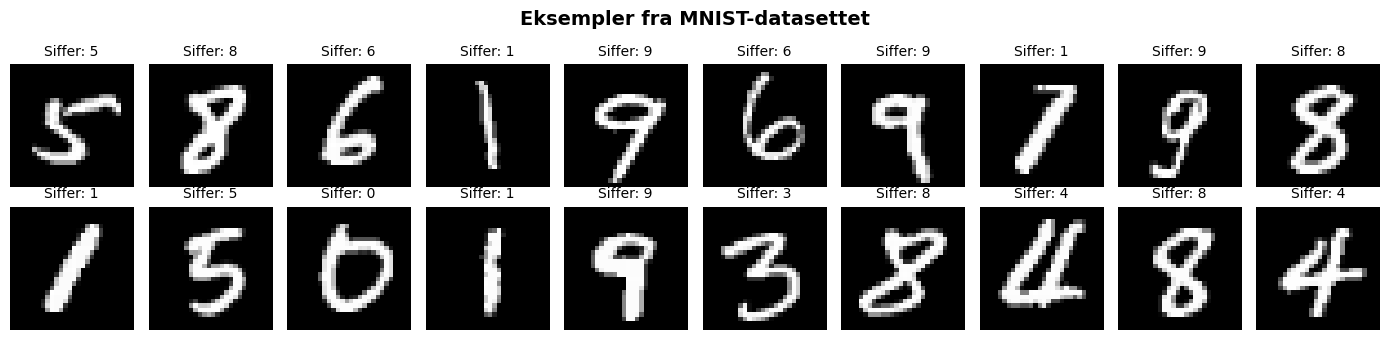

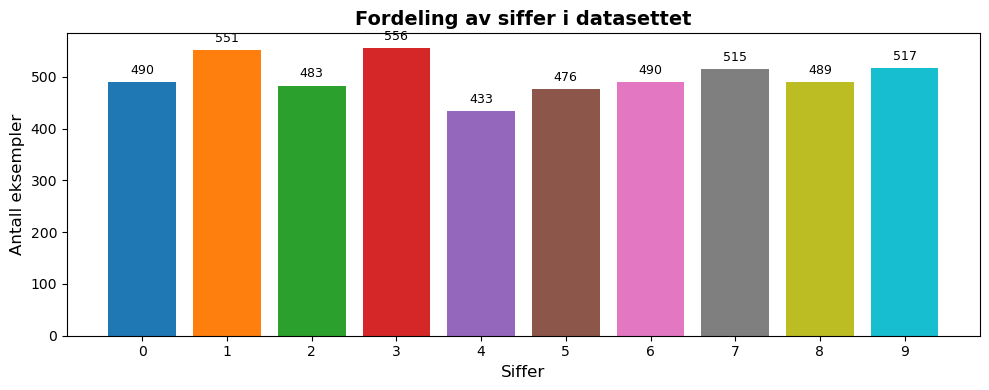


📊 Datasettet inneholder 5000 bilder fordelt på 10 siffer-klasser.
📐 Hvert bilde er 28×28 = 784 piksler (gråtone, verdier 0-1).


In [17]:
# === Visualiser MNIST-eksempler ===

def vis_mnist_eksempler(data, n_eksempler=20, tilfeldig=True):
    """
    Vis et rutenett med MNIST-siffer.
    
    Args:
        data: DataFrame med pikselverdier og 'label'-kolonne
        n_eksempler: Antall eksempler å vise
        tilfeldig: Om eksemplene skal velges tilfeldig
    """
    n_rader = 2
    n_kolonner = n_eksempler // n_rader
    
    fig, axes = plt.subplots(n_rader, n_kolonner, figsize=(14, 3.5))
    fig.suptitle('Eksempler fra MNIST-datasettet', fontsize=14, fontweight='bold')
    
    if tilfeldig:
        indices = np.random.choice(len(data), n_eksempler, replace=False)
    else:
        indices = range(n_eksempler)
    
    for idx, ax in enumerate(axes.flat):
        i = indices[idx]
        # Hent pikselverdier (alle kolonner unntatt 'label')
        piksler = data.iloc[i, :-1].values.reshape(28, 28)
        label = int(data.iloc[i]['label'])
        
        ax.imshow(piksler, cmap='gray')
        ax.set_title(f'Siffer: {label}', fontsize=10)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Vis også fordelingen av siffer i datasettet
    fig2, ax2 = plt.subplots(figsize=(10, 4))
    siffer_fordeling = data['label'].value_counts().sort_index()
    farger = plt.cm.tab10(np.linspace(0, 1, 10))
    bars = ax2.bar(siffer_fordeling.index, siffer_fordeling.values, color=farger)
    ax2.set_xlabel('Siffer', fontsize=12)
    ax2.set_ylabel('Antall eksempler', fontsize=12)
    ax2.set_title('Fordeling av siffer i datasettet', fontsize=14, fontweight='bold')
    ax2.set_xticks(range(10))
    
    # Legg til antall over hver stolpe
    for bar, antall in zip(bars, siffer_fordeling.values):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
                str(antall), ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Datasettet inneholder {len(data)} bilder fordelt på 10 siffer-klasser.")
    print(f"📐 Hvert bilde er {28}×{28} = 784 piksler (gråtone, verdier 0-1).")

# Kjør visualisering
vis_mnist_eksempler(mnist_data)


### Definere klasser og deres funksjoner

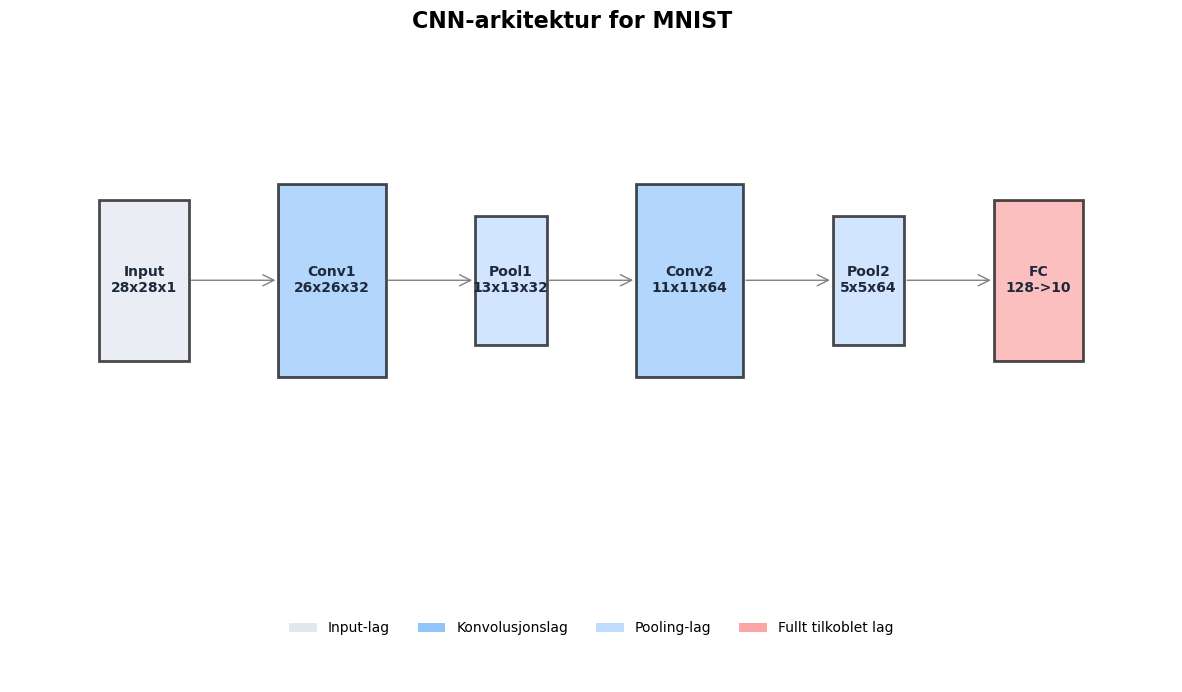

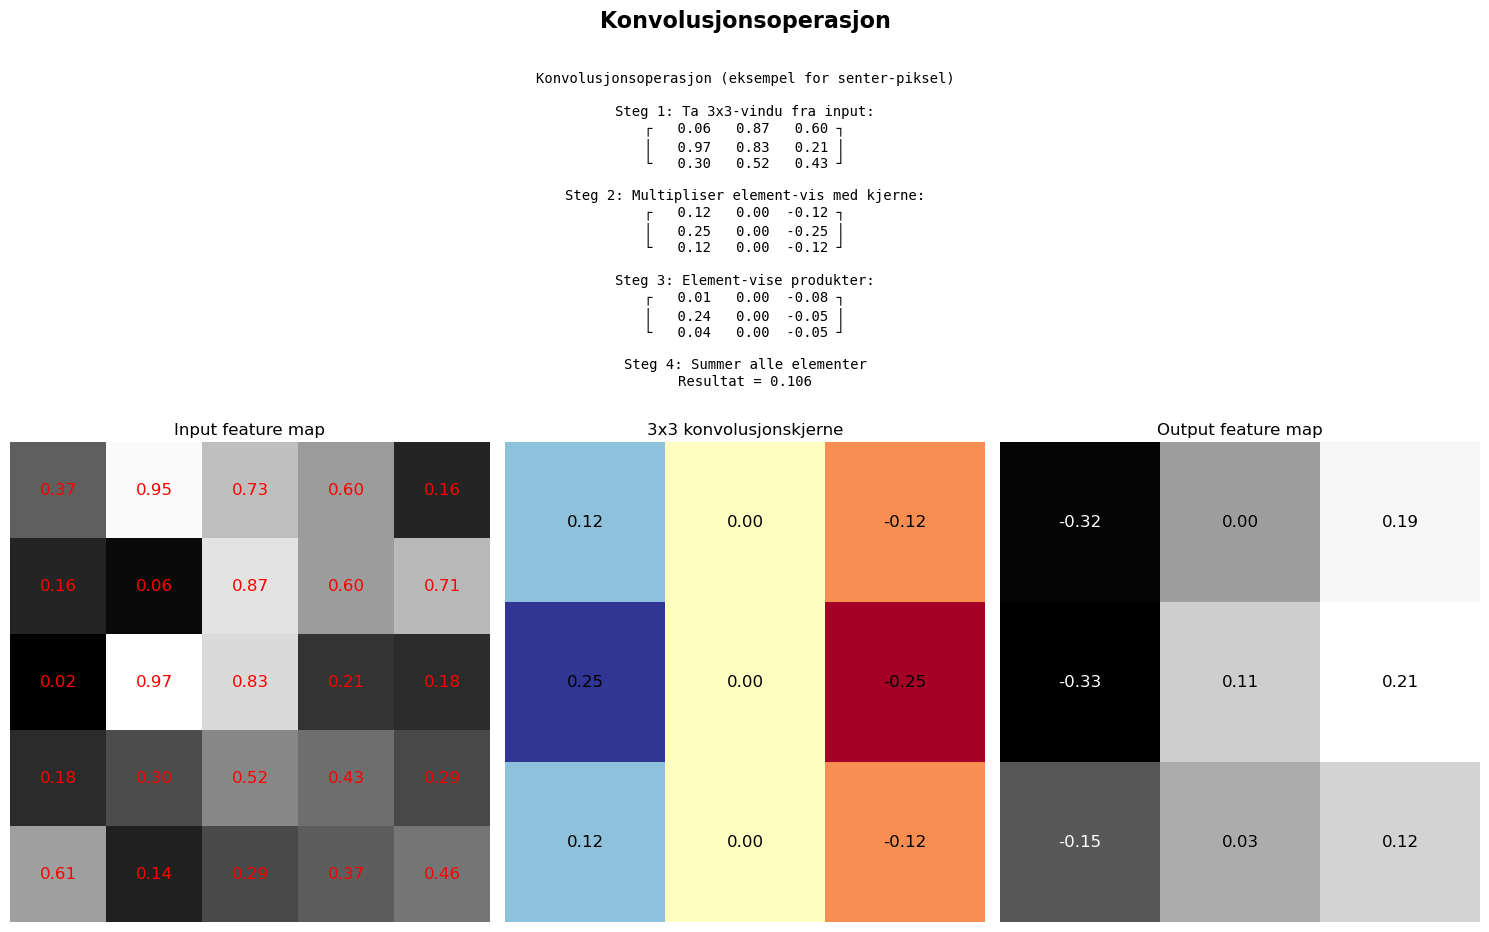

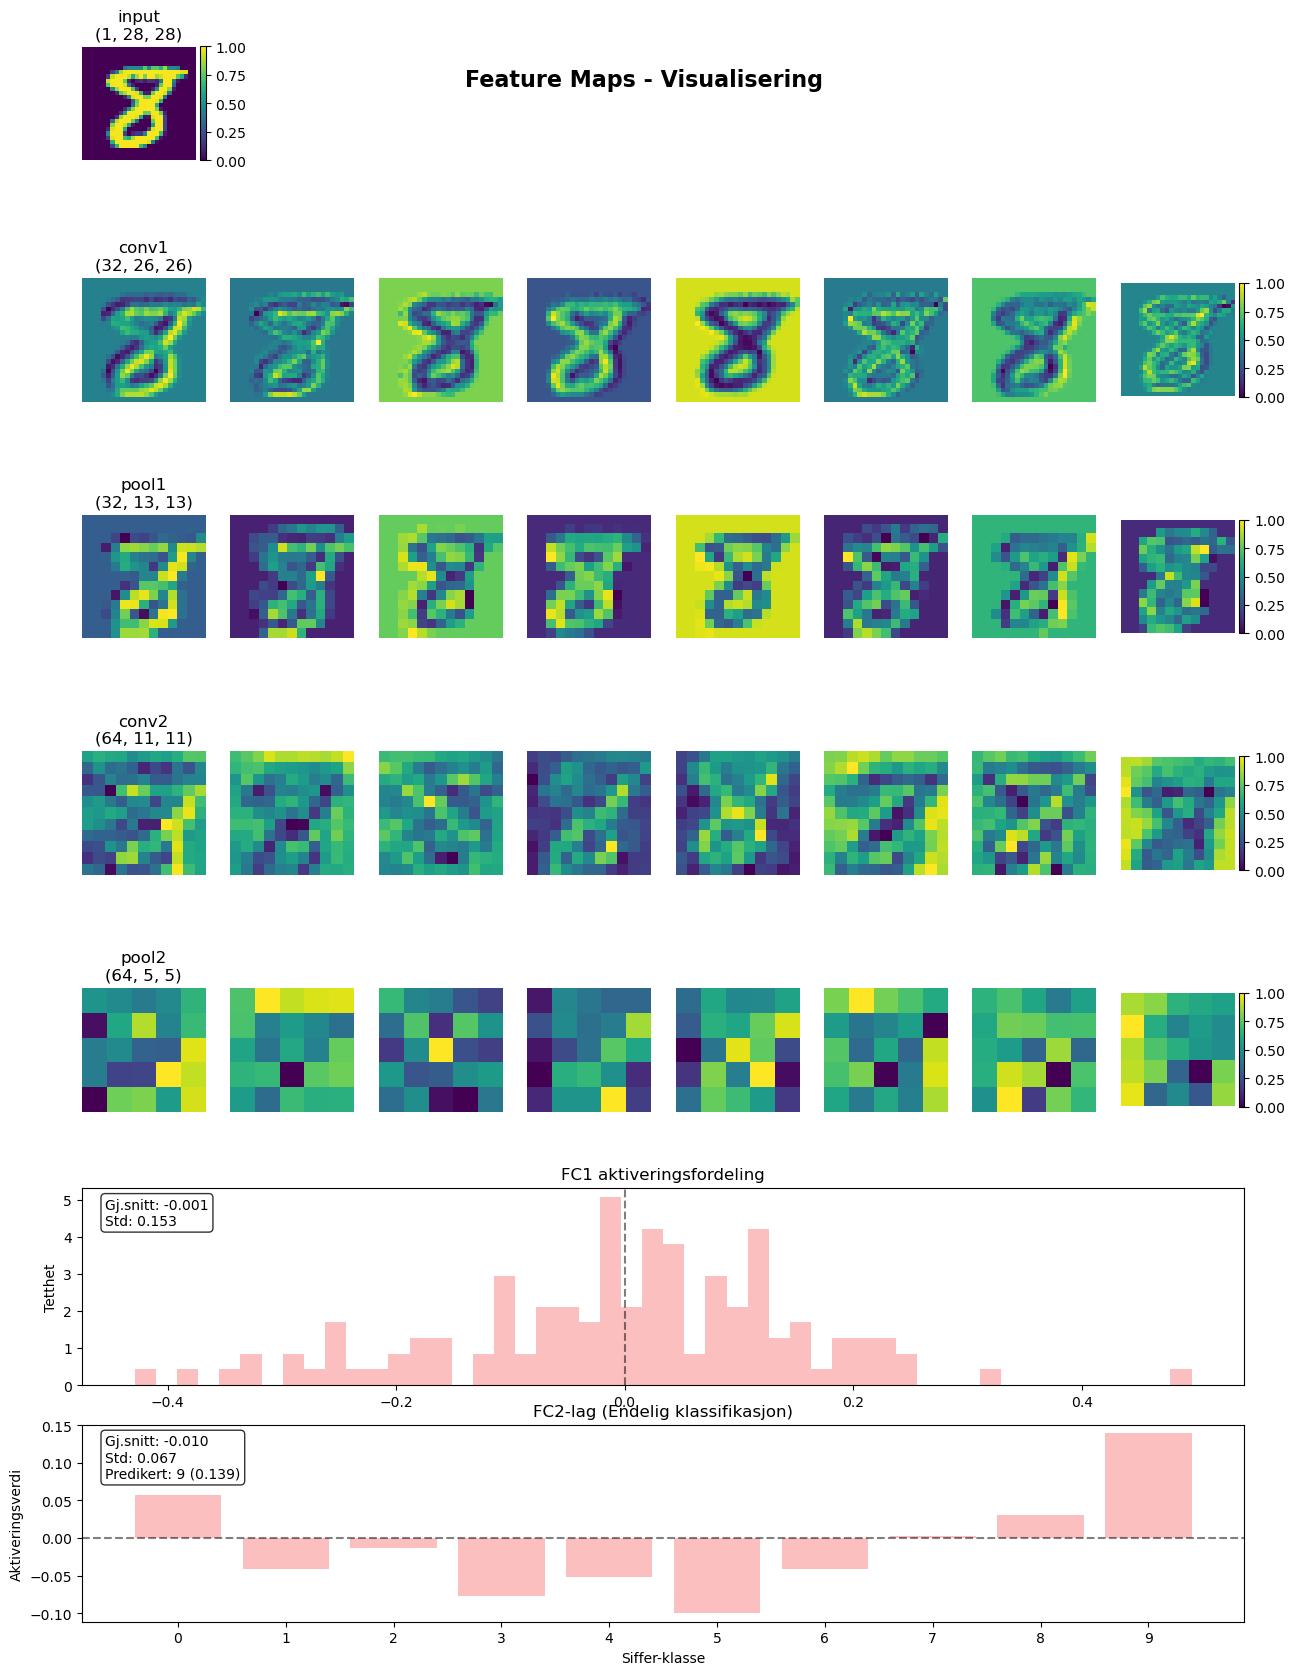

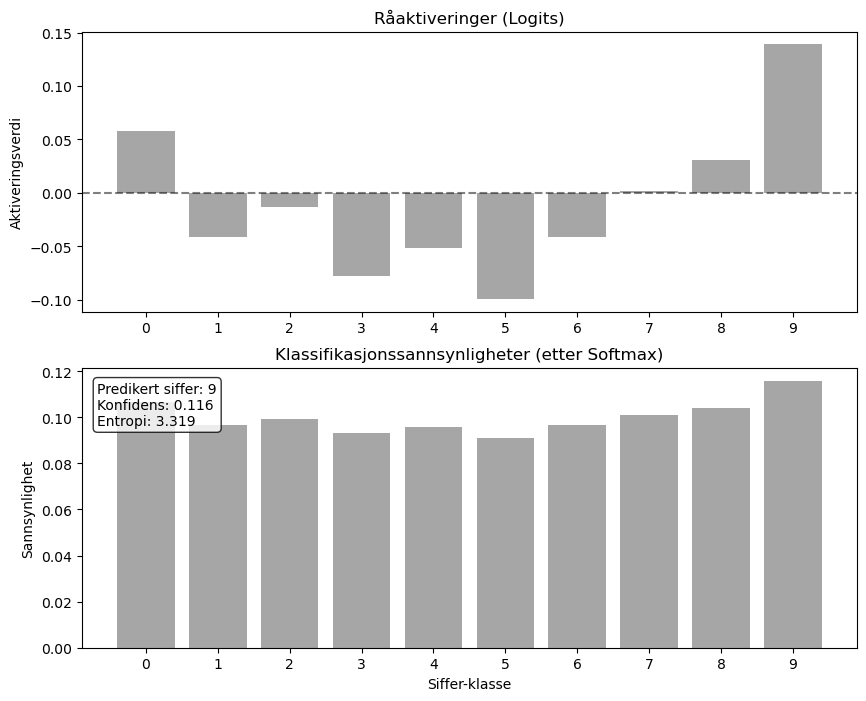

In [18]:
# === CNN-modell og visualisering ===

class SimpleCNN(nn.Module):
    """Enkel CNN-arkitektur for MNIST-klassifisering."""
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)  # 28x28x1 -> 26x26x32
        self.pool1 = nn.MaxPool2d(2, 2)   # 26x26x32 -> 13x13x32
        self.conv2 = nn.Conv2d(32, 64, 3) # 13x13x32 -> 11x11x64
        self.pool2 = nn.MaxPool2d(2, 2)   # 11x11x64 -> 5x5x64
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        lag = {}
        lag['input'] = x
        x = self.conv1(x)
        lag['conv1'] = x
        x = self.pool1(x)
        lag['pool1'] = x
        x = self.conv2(x)
        lag['conv2'] = x
        x = self.pool2(x)
        lag['pool2'] = x
        x = x.view(-1, 64 * 5 * 5)
        x = self.fc1(x)
        lag['fc1'] = x
        x = self.fc2(x)
        lag['fc2'] = x
        return x, lag


class CNNVisualizer:
    """Klasse for visualisering av CNN-arkitektur og feature maps."""
    
    def __init__(self):
        self.farger = {
            'input': '#e2e8f0',
            'conv': '#93c5fd',
            'pool': '#bfdbfe',
            'fc': '#fca5a5',
            'tekst': '#1e293b'
        }
        
    def tegn_arkitektur(self, lagre_sti=None):
        """Tegn CNN-arkitekturdiagram."""
        fig = plt.figure(figsize=(15, 8))
        gs = GridSpec(2, 1, height_ratios=[4, 1], hspace=0.3)
        ax_arch = fig.add_subplot(gs[0])
        ax_legend = fig.add_subplot(gs[1])
        
        # Lagkonfigurasjon
        lag_liste = [
            {'name': 'Input\n28x28x1', 'type': 'input', 'width': 1.0},
            {'name': 'Conv1\n26x26x32', 'type': 'conv', 'width': 1.2},
            {'name': 'Pool1\n13x13x32', 'type': 'pool', 'width': 0.8},
            {'name': 'Conv2\n11x11x64', 'type': 'conv', 'width': 1.2},
            {'name': 'Pool2\n5x5x64', 'type': 'pool', 'width': 0.8},
            {'name': 'FC\n128->10', 'type': 'fc', 'width': 1.0}
        ]
        
        # Tegn lag
        x_offset = 1
        for i, lag in enumerate(lag_liste):
            height = lag['width'] * 1.5
            width = lag['width']
            y_pos = (4 - height) / 2
            
            rect = patches.Rectangle(
                (x_offset, y_pos), width, height,
                facecolor=self.farger[lag['type']],
                edgecolor='black', alpha=0.7, linewidth=2
            )
            ax_arch.add_patch(rect)
            
            ax_arch.text(
                x_offset + width/2, y_pos + height/2, lag['name'],
                ha='center', va='center',
                color=self.farger['tekst'], fontsize=10, fontweight='bold'
            )
            
            if i < len(lag_liste) - 1:
                arrow = FancyArrowPatch(
                    (x_offset + width, y_pos + height/2),
                    (x_offset + width + 1, y_pos + height/2),
                    arrowstyle='->', mutation_scale=20, color='gray'
                )
                ax_arch.add_patch(arrow)
            
            x_offset += width + 1
        
        ax_arch.set_xlim(0, x_offset)
        ax_arch.set_ylim(0, 4)
        ax_arch.axis('off')
        
        # Legg til forklaring
        legend_elements = [
            patches.Patch(facecolor=self.farger['input'], label='Input-lag'),
            patches.Patch(facecolor=self.farger['conv'], label='Konvolusjonslag'),
            patches.Patch(facecolor=self.farger['pool'], label='Pooling-lag'),
            patches.Patch(facecolor=self.farger['fc'], label='Fullt tilkoblet lag')
        ]
        ax_legend.legend(handles=legend_elements, loc='center', ncol=4, frameon=False)
        ax_legend.axis('off')
        
        plt.suptitle('CNN-arkitektur for MNIST', fontsize=16, fontweight='bold', y=0.95)
        
        if lagre_sti:
            plt.savefig(lagre_sti, dpi=300, bbox_inches='tight')
            
        return fig


    def visualiser_klassifikasjon(self, aktiveringer, lagre_sti=None):
        """
        Visualiser klassifikasjonsresultater fra FC2-laget.
        
        Args:
            aktiveringer: Råaktiveringsverdier fra FC2-laget
            lagre_sti: Sti for å lagre visualiseringen
        """
        # Konverter til sannsynligheter med softmax
        sannsynligheter = torch.softmax(torch.tensor(aktiveringer), dim=0).numpy()
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), height_ratios=[1, 1])
        
        # Plot råaktiveringer
        x = np.arange(len(aktiveringer))
        ax1.bar(x, aktiveringer, alpha=0.7, color='gray')
        ax1.set_xticks(x)
        ax1.set_xticklabels([str(i) for i in range(10)])
        ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
        ax1.set_title('Råaktiveringer (Logits)')
        ax1.set_ylabel('Aktiveringsverdi')
        
        # Plot sannsynligheter
        ax2.bar(x, sannsynligheter, alpha=0.7, color='gray')
        ax2.set_xticks(x)
        ax2.set_xticklabels([str(i) for i in range(10)])
        ax2.set_title('Klassifikasjonssannsynligheter (etter Softmax)')
        ax2.set_xlabel('Siffer-klasse')
        ax2.set_ylabel('Sannsynlighet')
        
        # Legg til statistikk
        predikert_siffer = np.argmax(sannsynligheter)
        maks_sannsynlighet = np.max(sannsynligheter)
        entropi = -np.sum(sannsynligheter * np.log2(sannsynligheter + 1e-10))
        
        stats_tekst = (
            f'Predikert siffer: {predikert_siffer}\n'
            f'Konfidens: {maks_sannsynlighet:.3f}\n'
            f'Entropi: {entropi:.3f}'
        )
        
        ax2.text(0.02, 0.95, stats_tekst, transform=ax2.transAxes,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        if lagre_sti:
            plt.savefig(lagre_sti, dpi=300, bbox_inches='tight')
        
        return fig


    def visualiser_feature_maps(self, modell, input_bilde, lagre_sti=None):
        """Visualiser feature maps ved hvert lag i CNN."""
        modell.eval()
        
        with torch.no_grad():
            _, feature_maps = modell(input_bilde)
        
        n_lag = len(feature_maps)
        n_kolonner = 8
        fig = plt.figure(figsize=(15, 3 * n_lag))
        
        for idx, (lag_navn, feature_map) in enumerate(feature_maps.items()):
            feature_map = feature_map.squeeze(0)
            
            if lag_navn in ['fc1', 'fc2']:
                ax = plt.subplot(n_lag, 1, idx + 1)
                data = feature_map.numpy()

                if lag_navn == 'fc2':
                    x = np.arange(len(data))
                    ax.bar(x, data, alpha=0.7, color=self.farger['fc'])
                    ax.set_xticks(x)
                    ax.set_xticklabels([str(i) for i in range(10)])
                    ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
                    
                    gjennomsnitt = np.mean(data)
                    std = np.std(data)
                    maks_siffer = np.argmax(data)
                    maks_verdi = np.max(data)
                    
                    stats_tekst = (
                        f'Gj.snitt: {gjennomsnitt:.3f}\n'
                        f'Std: {std:.3f}\n'
                        f'Predikert: {maks_siffer} ({maks_verdi:.3f})'
                    )
                    
                    ax.text(0.02, 0.95, stats_tekst, transform=ax.transAxes,
                        verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
                    
                    ax.set_title('FC2-lag (Endelig klassifikasjon)')
                    ax.set_xlabel('Siffer-klasse')
                    ax.set_ylabel('Aktiveringsverdi')

                    class_fig = self.visualiser_klassifikasjon(data, 'klassifikasjon.png')
                    
                else:
                    ax.hist(data, bins=50, density=True, alpha=0.7, color=self.farger['fc'])
                    ax.axvline(x=0, color='black', linestyle='--', alpha=0.5)
                    
                    gjennomsnitt = np.mean(data)
                    std = np.std(data)
                    ax.text(0.02, 0.95, 
                        f'Gj.snitt: {gjennomsnitt:.3f}\nStd: {std:.3f}',
                        transform=ax.transAxes, verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
                    
                    ax.set_title('FC1 aktiveringsfordeling')
                    ax.set_ylabel('Tetthet')
                
            else:
                n_filtre = min(n_kolonner, feature_map.shape[0])
                for i in range(n_filtre):
                    ax = plt.subplot(n_lag, n_kolonner, idx * n_kolonner + i + 1)
                    
                    fm = feature_map[i].numpy()
                    vmin, vmax = fm.min(), fm.max()
                    if vmin != vmax:
                        fm = (fm - vmin) / (vmax - vmin)
                    
                    im = ax.imshow(fm, cmap='viridis')
                    ax.axis('off')
                    
                    if i == 0:
                        ax.set_title(f'{lag_navn}\n{tuple(feature_map.shape)}')
                    
                    if i == n_filtre - 1:
                        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        
                plt.suptitle('Feature Maps - Visualisering', 
                        fontsize=16, fontweight='bold', y=0.85)
        
        if lagre_sti:
            plt.savefig(lagre_sti, dpi=300, bbox_inches='tight')
        
        return fig  
     

    def visualiser_konvolusjon(self, lagre_sti=None):
        """Visualiser konvolusjonsoperasjonen."""
        fig = plt.figure(figsize=(15, 10))
        gs = GridSpec(2, 3, height_ratios=[1, 2])
        
        ax_eq = fig.add_subplot(gs[0, :])
        ax1 = fig.add_subplot(gs[1, 0])
        ax2 = fig.add_subplot(gs[1, 1])
        ax3 = fig.add_subplot(gs[1, 2])
        
        np.random.seed(42)
        input_data = np.random.rand(5, 5)
        kjerne = np.array([[1, 0, -1],
                          [2, 0, -2],
                          [1, 0, -1]]) / 8
        
        # Beregn output
        output = np.zeros((3, 3))
        for i in range(3):
            for j in range(3):
                output[i, j] = np.sum(input_data[i:i+3, j:j+3] * kjerne)
        
        i, j = 1, 1
        vindu = input_data[i:i+3, j:j+3]
        resultat = output[i, j]
        produkter = vindu * kjerne
        
        # Forklaring med ASCII-matriser
        eq_tekst = (
            "Konvolusjonsoperasjon (eksempel for senter-piksel)\n\n"
            "Steg 1: Ta 3x3-vindu fra input:\n"
            f"┌ {vindu[0,0]:6.2f} {vindu[0,1]:6.2f} {vindu[0,2]:6.2f} ┐\n"
            f"│ {vindu[1,0]:6.2f} {vindu[1,1]:6.2f} {vindu[1,2]:6.2f} │\n"
            f"└ {vindu[2,0]:6.2f} {vindu[2,1]:6.2f} {vindu[2,2]:6.2f} ┘\n\n"
            "Steg 2: Multipliser element-vis med kjerne:\n"
            f"┌ {kjerne[0,0]:6.2f} {kjerne[0,1]:6.2f} {kjerne[0,2]:6.2f} ┐\n"
            f"│ {kjerne[1,0]:6.2f} {kjerne[1,1]:6.2f} {kjerne[1,2]:6.2f} │\n"
            f"└ {kjerne[2,0]:6.2f} {kjerne[2,1]:6.2f} {kjerne[2,2]:6.2f} ┘\n\n"
            "Steg 3: Element-vise produkter:\n"
            f"┌ {produkter[0,0]:6.2f} {produkter[0,1]:6.2f} {produkter[0,2]:6.2f} ┐\n"
            f"│ {produkter[1,0]:6.2f} {produkter[1,1]:6.2f} {produkter[1,2]:6.2f} │\n"
            f"└ {produkter[2,0]:6.2f} {produkter[2,1]:6.2f} {produkter[2,2]:6.2f} ┘\n\n"
            "Steg 4: Summer alle elementer\n"
            f"Resultat = {resultat:.3f}"
        )
        
        ax_eq.text(0.5, 0.5, eq_tekst, ha='center', va='center',
                transform=ax_eq.transAxes, fontsize=10, family='monospace')
        ax_eq.axis('off')
        
        # Plot input
        im1 = ax1.imshow(input_data, cmap='gray')
        for i in range(input_data.shape[0]):
            for j in range(input_data.shape[1]):
                ax1.text(j, i, f'{input_data[i, j]:.2f}',
                        ha='center', va='center', color='red', fontsize=12)
        ax1.set_title('Input feature map')
        ax1.axis('off')
        
        # Plot kjerne
        im2 = ax2.imshow(kjerne, cmap='RdYlBu')
        for i in range(kjerne.shape[0]):
            for j in range(kjerne.shape[1]):
                ax2.text(j, i, f'{kjerne[i, j]:.2f}',
                        ha='center', va='center', color='black', fontsize=12)
        ax2.set_title('3x3 konvolusjonskjerne')
        ax2.axis('off')
        
        # Plot output
        im3 = ax3.imshow(output, cmap='gray')
        for i in range(output.shape[0]):
            for j in range(output.shape[1]):
                piksel_verdi = output[i, j]
                normalisert = (piksel_verdi - output.min()) / (output.max() - output.min())
                tekst_farge = 'white' if normalisert < 0.5 else 'black'
                ax3.text(j, i, f'{piksel_verdi:.2f}',
                        ha='center', va='center', color=tekst_farge, fontsize=12)
        ax3.set_title('Output feature map')
        ax3.axis('off')
        
        plt.suptitle('Konvolusjonsoperasjon', fontsize=16, fontweight='bold')
        plt.tight_layout()
        
        if lagre_sti:
            plt.savefig(lagre_sti, dpi=300, bbox_inches='tight')
            
        return fig


# === Kjør visualisering ===
if __name__ == "__main__":
    # Opprett visualiserer
    visualizer = CNNVisualizer()
    
    # Tegn og lagre arkitektur
    arch_fig = visualizer.tegn_arkitektur(lagre_sti='mnist_images/cnn_arkitektur.png')
    
    # Tegn og lagre konvolusjonsoperasjon
    conv_fig = visualizer.visualiser_konvolusjon(lagre_sti='mnist_images/konvolusjon.png')
    
    # Opprett modell
    modell = SimpleCNN()
    dummy_input = torch.randn(1, 1, 28, 28)  # Batch 1, 1 kanal, 28x28

    # Last og preprosesser MNIST-bildet
    if is_colab:
        import requests
        import io
        from PIL import Image

        url = 'https://raw.githubusercontent.com/arvidl/ELMED219-2026/main/Lab2-DL/data/mnist_image_0000.png'
        response = requests.get(url, stream=True).raw
        image = Image.open(response)
        img = np.array(image)
    else:
        img_sti = "../data/mnist_image_0000.png"
        img = plt.imread(img_sti)
    
    # Konverter RGBA til gråtone hvis nødvendig
    if len(img.shape) == 3:
        img = img[:, :, 0]
    
    # Konverter til tensor og legg til batch- og kanaldimensjoner
    input_bilde = torch.from_numpy(img).float()
    input_bilde = input_bilde.unsqueeze(0).unsqueeze(0)  # Form: (1, 1, 28, 28)
  
    # Visualiser feature maps med MNIST-bilde
    feature_fig = visualizer.visualiser_feature_maps(
        modell, input_bilde, lagre_sti='mnist_images/feature_maps.png'
    )
    
    plt.show()

### Forstå feature map-visualiseringen

Visualiseringen viser hvordan inputbildet transformeres når det passerer gjennom ulike lag i det konvolusjonelle nevrale nettverket (CNN). La oss gå gjennom hvert lag:

#### Input Layer
- Shows the original 28×28 grayscale image
- Single channel input (shape: 1×28×28)
- Random values in this case (from torch.randn)
- Displays the raw pixel intensities before any processing

#### Conv1 Layer
- First convolutional layer with 32 filters
- Output shape: 26×26×32 (reduced from 28×28 due to 3×3 kernel without padding)
- Each feature map shows different patterns/features learned by individual filters
- Some filters may activate on edges, others on textures or specific patterns

#### Pool1 Layer
- First max pooling layer (2×2 window with stride 2)
- Output shape: 13×13×32 (halved dimensions from Conv1)
- Preserves important features while reducing spatial dimensions
- Helps achieve spatial invariance and reduces computation

#### Conv2 Layer
- Second convolutional layer with 64 filters
- Output shape: 11×11×64
- Learns more complex features by combining patterns from Pool1
- Higher-level features compared to Conv1 (more abstract patterns)

#### Pool2 Layer
- Second max pooling layer
- Output shape: 5×5×64
- Further reduces spatial dimensions
- Maintains most important features for classification

#### FC1 Activation Distribution
- First fully connected layer (flattened Pool2 → 128 neurons)
- Shows histogram of activation values
- Mean and standard deviation indicate the spread of activations
- Distribution shape reveals how neurons are utilizing the activation space

#### FC2 Activation Distribution
- Final fully connected layer (128 → 10 neurons)
- Output corresponds to class probabilities (for MNIST digits 0-9)
- Distribution typically shows more distinct patterns as it's directly related to classification
- Mean and std values indicate the confidence and spread of predictions

The progression through these layers demonstrates how the network transforms from raw pixel data to increasingly abstract features, ultimately leading to classification outputs. The feature maps provide insights into what patterns each layer has learned to detect.


### Merknad om FC2-laget (endelig klassifiseringslag)

I FC2-laget (endelig klassifiseringslag) følger beslutningsprosessen disse stegene:

1. **Raw Activations**: 
   - Each neuron outputs an activation value for digits 0-9
   - These values can be positive or negative
   - They are often called "logits" in this raw form

2. **Softmax Transformation**:
   - To convert these raw activations into probabilities, we apply the softmax function:
   ```python
      probabilities = torch.softmax(activations, dim=0)
   ```
   - Softmax formula: P(class_i) = exp(activation_i) / Σ(exp(activation_j))
   - This ensures:
     - All values are positive (0 to 1)
     - Sum of probabilities equals 1
     - Preserves relative ordering of activations

3. **Final Decision**:
   - The digit with the highest probability is chosen as the prediction
   - In code:



This visualization shows:
1. **Raw Activations**:
   - Positive and negative values
   - Relative strengths of each class
   - Zero baseline for reference

2. **Probabilities**:
   - Values between 0 and 1
   - Sum to 1.0
   - Easy to interpret as confidence scores
   - Entropy shows uncertainty in prediction

The network's decision is based on these probabilities, not the raw activations directly. A high positive activation generally leads to a high probability, but the softmax function considers the relative differences between all activations when computing the final probabilities. <br>Entropy: {-np.sum(probabilities * np.log2(probabilities + 1e-10)):.3f}

